In [3]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 409.6 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 476.3 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 476.3 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 544.7 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/258.3 kB 544.7 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/258.3 kB 491.5 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 566.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\TADASHI's - BAYMAX\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **Import necessary libraries**


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings

In [5]:
warnings.filterwarnings("ignore")

## **Load the dataset**


In [6]:
df = pd.read_csv("telecom_churn_dataset.csv")

# **Data Cleaning and Exploration**

### **Explore the dataset**


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Check for missing data
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
# Check the number of unique values in columns
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### **Visualize distributions and correlations**

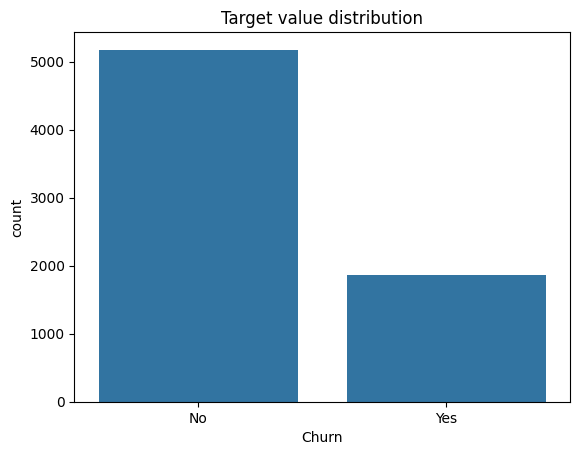

In [12]:
# Visualize the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title('Target value distribution')
plt.show()

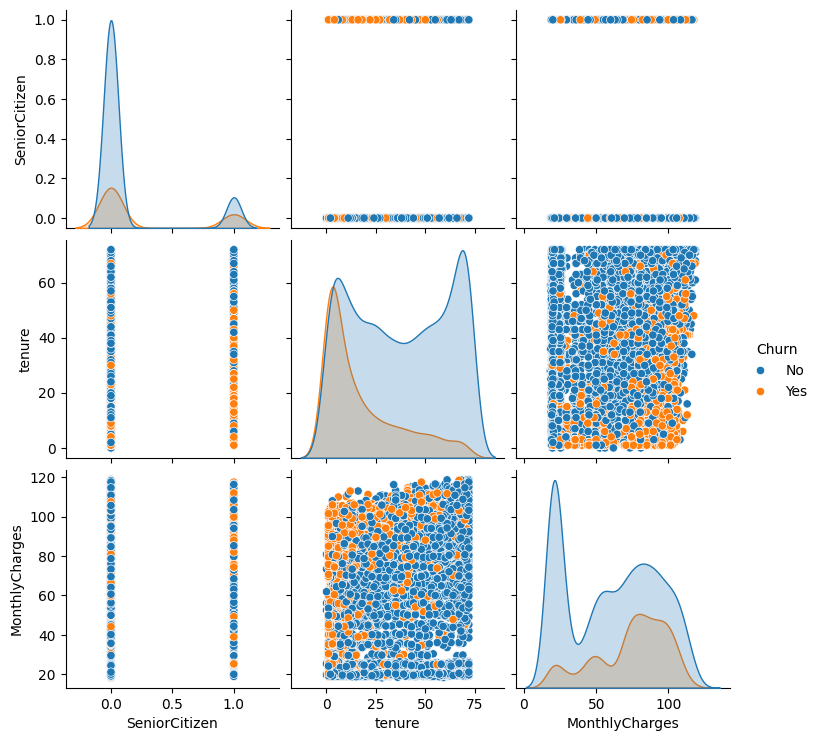

In [13]:
sns.pairplot(df, hue='Churn')
plt.show()

### **Define features and target variable**

In [14]:
df.drop(['customerID'], axis=1, inplace=True) # no need customer ID

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### **Convert categorical variables**

In [16]:
# Encode categorical data
categorical = df.select_dtypes(include=['object']).columns
for i in categorical:
    if i != 'Churn':
        df[i] = LabelEncoder().fit_transform(df[i])

In [17]:
# Convert 'Churn' to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
# Split the data into features and target
features = df.drop('Churn', axis=1)
# we want to predict Churn
target = df['Churn']

In [19]:
features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


### **Feature Scaling**

In [20]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [21]:
features[0]

array([-1.00955867, -0.43991649,  1.03453023, -0.65401193, -1.27744458,
       -3.05401039,  0.06272275, -1.18323364, -0.91883775,  1.24254983,
       -1.02791014, -0.92526212, -1.11349541, -1.12140513, -0.8282069 ,
        0.8297975 ,  0.39855772, -1.16032292, -0.39860759])

## **Apply PCA**

In [22]:
pca = PCA(n_components=10)  # Reduce to 10 components for simplicity
features_pca = pca.fit_transform(features)

### **Split the dataset into training and testing sets**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=20)

In [24]:
print("length of training data without SMOTE oversampling: ", len(X_train))

length of training data without SMOTE oversampling:  5634


### **Apply SMOTE for oversampling**

In [25]:
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
print("length of training data with SMOTE oversampling:", len(X_train_resampled))

length of training data with SMOTE oversampling: 8222


In [27]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

# **Model Selection and Implementation**



### **Logistic Regression**

In [28]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, conf_matrix_logreg = evaluate_model(y_test, y_pred_logreg)

## **Decision Tree**


In [29]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test)
accuracy_dt, precision_dt, recall_dt, f1_dt, conf_matrix_dt = evaluate_model(y_test, y_pred_dt)

## **K-Nearest Neighbors**

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
accuracy_knn, precision_knn, recall_knn, f1_knn, conf_matrix_knn = evaluate_model(y_test, y_pred_knn)

## **Naive Bayes**



In [31]:
nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb.predict(X_test)
accuracy_nb, precision_nb, recall_nb, f1_nb, conf_matrix_nb = evaluate_model(y_test, y_pred_nb)

## **Neural Network**

In [32]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train_resampled, y_train_resampled)
y_pred_nn = nn.predict(X_test)
accuracy_nn, precision_nn, recall_nn, f1_nn, conf_matrix_nn = evaluate_model(y_test, y_pred_nn)


# **Model Evaluation**

### **Print evaluation metrics**

In [33]:
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)

print("\nDecision Tree Evaluation:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

print("\nNaive Bayes Evaluation:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Confusion Matrix:\n", conf_matrix_nb)

print("\nK-Nearest Neighbors Evaluation:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

print("\nNeural Network Evaluation:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)
print("Confusion Matrix:\n", conf_matrix_nn)

Logistic Regression Evaluation:
Accuracy: 0.752306600425834
Precision: 0.4973730297723292
Recall: 0.8208092485549133
F1 Score: 0.6194111232279171
Confusion Matrix:
 [[776 287]
 [ 62 284]]

Decision Tree Evaluation:
Accuracy: 0.7317246273953159
Precision: 0.46172248803827753
Recall: 0.5578034682080925
F1 Score: 0.5052356020942408
Confusion Matrix:
 [[838 225]
 [153 193]]

Naive Bayes Evaluation:
Accuracy: 0.7352732434350603
Precision: 0.47700170357751276
Recall: 0.8092485549132948
F1 Score: 0.6002143622722401
Confusion Matrix:
 [[756 307]
 [ 66 280]]

K-Nearest Neighbors Evaluation:
Accuracy: 0.6799148332150461
Precision: 0.41491085899513774
Recall: 0.7398843930635838
F1 Score: 0.5316718587746625
Confusion Matrix:
 [[702 361]
 [ 90 256]]

Neural Network Evaluation:
Accuracy: 0.7558552164655784
Precision: 0.5022321428571429
Recall: 0.6502890173410405
F1 Score: 0.5667506297229219
Confusion Matrix:
 [[840 223]
 [121 225]]
